# World University Rankings

### About Dataset

###### This dataset is taken from the site https://www.kaggle.com/ for educational purposes.

https://www.kaggle.com/datasets/mylesoneill/world-university-rankings

### Loading data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [9]:
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [10]:
df = pd.read_csv('cwurData.csv')

In [11]:
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


### Train and Test

In [13]:
len(df)

2200

In [14]:
train, test = train_test_split(df, random_state=1)

In [15]:
len(train)

1650

In [16]:
len(test)

550

In [17]:
len(train) + len(test)

2200

In [18]:
len(test) / len(df)

0.25

### Data Analysis

In [20]:
train.isna().mean()

world_rank              0.000000
institution             0.000000
country                 0.000000
national_rank           0.000000
quality_of_education    0.000000
alumni_employment       0.000000
quality_of_faculty      0.000000
publications            0.000000
influence               0.000000
citations               0.000000
broad_impact            0.095758
patents                 0.000000
score                   0.000000
year                    0.000000
dtype: float64

<Axes: >

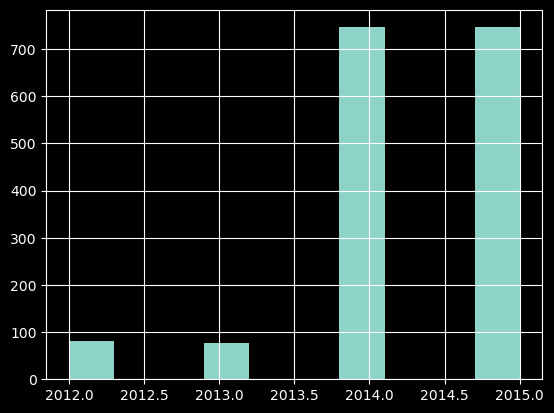

In [21]:
train['year'].hist()

In [22]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [23]:
train['institution'].describe()

count                                1650
unique                                963
top       Ohio State University, Columbus
freq                                    4
Name: institution, dtype: object

In [24]:
train['country'].describe()

count     1650
unique      57
top        USA
freq       434
Name: country, dtype: object

In [25]:
train.groupby('year')['world_rank'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
2012,82,50.121951,48.5
2013,76,51.815789,52.5
2014,746,501.471850,503.5
2015,746,510.851206,512.5


In [26]:
train.groupby('year')['national_rank'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
2012,82,19.304878,12.5
2013,76,17.973684,8.5
2014,746,43.467828,23.5
2015,746,42.808311,23.5


In [27]:
train.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [28]:
train.groupby('country')['score'].agg(['count', 'mean', 'median', 'max', 'min'])

,count,mean,median,max,min
country,,,,,
Argentina,5,44.552000,44.390,45.37,44.10
Australia,40,45.972250,44.685,51.61,44.09
Austria,19,45.256842,45.040,47.78,44.30
Belgium,14,46.798571,46.145,52.03,44.31
Brazil,23,44.734783,44.360,49.31,44.03
Bulgaria,1,44.480000,44.480,44.48,44.48
Canada,52,47.417308,45.555,60.87,44.03
Chile,5,44.860000,45.290,45.33,44.07
China,140,45.045071,44.475,55.30,44.02


### Baseline

In [30]:
train['score_mean'] = train['score'].mean()

In [31]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_mean
91,92,University of Queensland,Australia,1,101,101,101,67,90,89,NaN,46,44.18,2012,47.662327
435,236,Brandeis University,USA,97,49,311,79,527,169,493,322.0,128,47.31,2014,47.662327
619,420,King Saud University,Saudi Arabia,1,355,133,210,611,537,800,897.0,115,45.45,2014,47.662327
1450,251,University of Düsseldorf,Germany,21,185,567,218,297,209,182,178.0,454,46.54,2015,47.662327
1265,66,Boston University,USA,41,303,54,83,60,45,37,34.0,135,53.43,2015,47.662327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,761,Peking Union Medical College,China,41,355,478,210,281,308,800,909.0,637,44.57,2014,47.662327
905,706,Kaiserslautern University of Technology,Germany,46,355,478,210,652,483,800,605.0,737,44.63,2014,47.662327
1096,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,849.0,737,44.39,2014,47.662327
235,36,École Polytechnique,France,2,150,6,208,323,282,250,295.0,181,59.54,2014,47.662327


In [32]:
train['err'] = train['score_mean'] - train['score']

In [33]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_mean,err
91,92,University of Queensland,Australia,1,101,101,101,67,90,89,NaN,46,44.18,2012,47.662327,3.482327
435,236,Brandeis University,USA,97,49,311,79,527,169,493,322.0,128,47.31,2014,47.662327,0.352327
619,420,King Saud University,Saudi Arabia,1,355,133,210,611,537,800,897.0,115,45.45,2014,47.662327,2.212327
1450,251,University of Düsseldorf,Germany,21,185,567,218,297,209,182,178.0,454,46.54,2015,47.662327,1.122327
1265,66,Boston University,USA,41,303,54,83,60,45,37,34.0,135,53.43,2015,47.662327,-5.767673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,761,Peking Union Medical College,China,41,355,478,210,281,308,800,909.0,637,44.57,2014,47.662327,3.092327
905,706,Kaiserslautern University of Technology,Germany,46,355,478,210,652,483,800,605.0,737,44.63,2014,47.662327,3.032327
1096,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,849.0,737,44.39,2014,47.662327,3.272327
235,36,École Polytechnique,France,2,150,6,208,323,282,250,295.0,181,59.54,2014,47.662327,-11.877673


In [34]:
train['err_abs'] = abs(train['err'])

In [35]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_mean,err,err_abs
91,92,University of Queensland,Australia,1,101,101,101,67,90,89,NaN,46,44.18,2012,47.662327,3.482327,3.482327
435,236,Brandeis University,USA,97,49,311,79,527,169,493,322.0,128,47.31,2014,47.662327,0.352327,0.352327
619,420,King Saud University,Saudi Arabia,1,355,133,210,611,537,800,897.0,115,45.45,2014,47.662327,2.212327,2.212327
1450,251,University of Düsseldorf,Germany,21,185,567,218,297,209,182,178.0,454,46.54,2015,47.662327,1.122327,1.122327
1265,66,Boston University,USA,41,303,54,83,60,45,37,34.0,135,53.43,2015,47.662327,-5.767673,5.767673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,761,Peking Union Medical College,China,41,355,478,210,281,308,800,909.0,637,44.57,2014,47.662327,3.092327,3.092327
905,706,Kaiserslautern University of Technology,Germany,46,355,478,210,652,483,800,605.0,737,44.63,2014,47.662327,3.032327,3.032327
1096,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,849.0,737,44.39,2014,47.662327,3.272327,3.272327
235,36,École Polytechnique,France,2,150,6,208,323,282,250,295.0,181,59.54,2014,47.662327,-11.877673,11.877673


In [36]:
train['err_abs'].mean()

4.043044143250686

In [37]:
train['err_abs_pct'] = train['err_abs'] / train['score']

In [38]:
train['err_abs_pct'].mean()

0.07478842410434348

In [39]:
train['score_median'] = train['score'].median()

In [40]:
train['score_median']

91      45.04
435     45.04
619     45.04
1450    45.04
1265    45.04
        ...  
960     45.04
905     45.04
1096    45.04
235     45.04
1061    45.04
Name: score_median, Length: 1650, dtype: float64

In [41]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,score_mean,err,err_abs,err_abs_pct,score_median
91,92,University of Queensland,Australia,1,101,101,101,67,90,89,NaN,46,44.18,2012,47.662327,3.482327,3.482327,0.078821,45.04
435,236,Brandeis University,USA,97,49,311,79,527,169,493,322.0,128,47.31,2014,47.662327,0.352327,0.352327,0.007447,45.04
619,420,King Saud University,Saudi Arabia,1,355,133,210,611,537,800,897.0,115,45.45,2014,47.662327,2.212327,2.212327,0.048676,45.04
1450,251,University of Düsseldorf,Germany,21,185,567,218,297,209,182,178.0,454,46.54,2015,47.662327,1.122327,1.122327,0.024115,45.04
1265,66,Boston University,USA,41,303,54,83,60,45,37,34.0,135,53.43,2015,47.662327,-5.767673,5.767673,0.107948,45.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,761,Peking Union Medical College,China,41,355,478,210,281,308,800,909.0,637,44.57,2014,47.662327,3.092327,3.092327,0.069381,45.04
905,706,Kaiserslautern University of Technology,Germany,46,355,478,210,652,483,800,605.0,737,44.63,2014,47.662327,3.032327,3.032327,0.067944,45.04
1096,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,849.0,737,44.39,2014,47.662327,3.272327,3.272327,0.073718,45.04
235,36,École Polytechnique,France,2,150,6,208,323,282,250,295.0,181,59.54,2014,47.662327,-11.877673,11.877673,0.199491,45.04


In [42]:
def error(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))

In [43]:
error(train['score'], train['score_mean'])

4.043044143250686
0.07478842410434348


In [44]:
error(train['score'], train['score_median'])

3.1805212121212123
0.052824788641638115


In [45]:
train.groupby('year')['score'].mean()

year
2012    54.974634
2013    54.577105
2014    47.260362
2015    46.556072
Name: score, dtype: float64

In [46]:
train.groupby('country')['score'].mean()

country
Argentina               44.552000
Australia               45.972250
Austria                 45.256842
Belgium                 46.798571
Brazil                  44.734783
Bulgaria                44.480000
Canada                  47.417308
Chile                   44.860000
China                   45.045071
Colombia                44.556667
Croatia                 44.620000
Cyprus                  44.210000
Czech Republic          44.870000
Denmark                 47.482222
Egypt                   44.230000
Estonia                 44.810000
Finland                 44.923125
France                  46.196667
Germany                 46.393636
Greece                  44.892308
Hong Kong               46.540000
Hungary                 44.591111
Iceland                 44.980000
India                   44.685652
Iran                    44.243333
Ireland                 45.094545
Israel                  52.424667
Italy                   45.439855
Japan                   47.596018
Lebano

In [47]:
model_year_mean = train.groupby('country')['score'].mean()

In [48]:
model_year_mean.columns = ['country', 'score_country_mean']

In [49]:
train = train.merge(model_year_mean,how='left',on='country')

In [57]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score_x,year,score_mean,err,err_abs,err_abs_pct,score_median,score_y
0,92,University of Queensland,Australia,1,101,101,101,67,90,89,NaN,46,44.18,2012,47.662327,3.482327,3.482327,0.078821,45.04,45.972250
1,236,Brandeis University,USA,97,49,311,79,527,169,493,322.0,128,47.31,2014,47.662327,0.352327,0.352327,0.007447,45.04,51.603894
2,420,King Saud University,Saudi Arabia,1,355,133,210,611,537,800,897.0,115,45.45,2014,47.662327,2.212327,2.212327,0.048676,45.04,44.511250
3,251,University of Düsseldorf,Germany,21,185,567,218,297,209,182,178.0,454,46.54,2015,47.662327,1.122327,1.122327,0.024115,45.04,46.393636
4,66,Boston University,USA,41,303,54,83,60,45,37,34.0,135,53.43,2015,47.662327,-5.767673,5.767673,0.107948,45.04,51.603894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,761,Peking Union Medical College,China,41,355,478,210,281,308,800,909.0,637,44.57,2014,47.662327,3.092327,3.092327,0.069381,45.04,45.045071
1646,706,Kaiserslautern University of Technology,Germany,46,355,478,210,652,483,800,605.0,737,44.63,2014,47.662327,3.032327,3.032327,0.067944,45.04,46.393636
1647,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,849.0,737,44.39,2014,47.662327,3.272327,3.272327,0.073718,45.04,44.552000
1648,36,École Polytechnique,France,2,150,6,208,323,282,250,295.0,181,59.54,2014,47.662327,-11.877673,11.877673,0.199491,45.04,46.196667


In [61]:
error(train['score_x'], train['score_y'])

3.5197842587748824
0.06469242836347996


In [63]:
error(train['score_x'], train['score_median'])

3.1805212121212123
0.052824788641638115


In [75]:
test = test.merge(model_year_mean,how='left',on='score')

In [77]:
test

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,77,University of Notre Dame,USA,47,221,24,155,242,242,182,235.0,352,52.27,2015
1,247,University of Florence,Italy,6,327,326,94,218,275,197,227.0,564,46.58,2015
2,136,Ghent University,Belgium,2,115,282,139,89,158,81,129.0,121,49.73,2014
3,259,Virginia Commonwealth University,USA,100,367,403,150,264,253,321,213.0,206,46.43,2015
4,839,University of Miyazaki,Japan,62,290,567,218,952,692,645,826.0,393,44.19,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,788,Capital Medical University,China,46,367,567,218,525,754,511,741.0,871,44.26,2015
547,393,Simon Fraser University,Canada,17,355,478,210,286,281,406,341.0,373,45.58,2014
548,271,Virginia Polytechnic Institute and State Unive...,USA,111,270,185,210,196,267,200,281.0,227,46.72,2014
549,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015


In [90]:
model_year_median = train.groupby('country')['score_x'].median()

In [92]:
model_year_median

country
Argentina               44.390
Australia               44.685
Austria                 45.040
Belgium                 46.145
Brazil                  44.360
Bulgaria                44.480
Canada                  45.555
Chile                   45.290
China                   44.475
Colombia                44.430
Croatia                 44.620
Cyprus                  44.210
Czech Republic          44.540
Denmark                 47.120
Egypt                   44.280
Estonia                 44.810
Finland                 44.965
France                  44.760
Germany                 45.920
Greece                  44.740
Hong Kong               46.095
Hungary                 44.480
Iceland                 44.980
India                   44.550
Iran                    44.270
Ireland                 44.490
Israel                  49.120
Italy                   44.940
Japan                   44.710
Lebanon                 44.380
Malaysia                44.970
Mexico                  44.580


In [94]:
train = train.merge(model_year_median,how='left',on='country')

In [96]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,...,patents,score_x_x,year,score_mean,err,err_abs,err_abs_pct,score_median,score_y,score_x_y
0,92,University of Queensland,Australia,1,101,101,101,67,90,89,...,46,44.18,2012,47.662327,3.482327,3.482327,0.078821,45.04,45.972250,44.685
1,236,Brandeis University,USA,97,49,311,79,527,169,493,...,128,47.31,2014,47.662327,0.352327,0.352327,0.007447,45.04,51.603894,46.915
2,420,King Saud University,Saudi Arabia,1,355,133,210,611,537,800,...,115,45.45,2014,47.662327,2.212327,2.212327,0.048676,45.04,44.511250,44.440
3,251,University of Düsseldorf,Germany,21,185,567,218,297,209,182,...,454,46.54,2015,47.662327,1.122327,1.122327,0.024115,45.04,46.393636,45.920
4,66,Boston University,USA,41,303,54,83,60,45,37,...,135,53.43,2015,47.662327,-5.767673,5.767673,0.107948,45.04,51.603894,46.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,761,Peking Union Medical College,China,41,355,478,210,281,308,800,...,637,44.57,2014,47.662327,3.092327,3.092327,0.069381,45.04,45.045071,44.475
1646,706,Kaiserslautern University of Technology,Germany,46,355,478,210,652,483,800,...,737,44.63,2014,47.662327,3.032327,3.032327,0.067944,45.04,46.393636,45.920
1647,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,...,737,44.39,2014,47.662327,3.272327,3.272327,0.073718,45.04,44.552000,44.390
1648,36,École Polytechnique,France,2,150,6,208,323,282,250,...,181,59.54,2014,47.662327,-11.877673,11.877673,0.199491,45.04,46.196667,44.760


In [100]:
error(train['score_x_x'], train['score_x_y'])

2.9403696969696975
0.04891217461431135


In [102]:
train.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score_x_x', 'year', 'score_mean', 'err', 'err_abs', 'err_abs_pct',
       'score_median', 'score_y', 'score_x_y'],
      dtype='object')

In [112]:
train.groupby('country')[['score_x_x', 'quality_of_education']].agg(['count', 'mean', 'median'])

score_x_x                    quality_of_education  \
                         count       mean  median                count   
country                                                                  
Argentina                    5  44.552000  44.390                    5   
Australia                   40  45.972250  44.685                   40   
Austria                     19  45.256842  45.040                   19   
Belgium                     14  46.798571  46.145                   14   
Brazil                      23  44.734783  44.360                   23   
Bulgaria                     1  44.480000  44.480                    1   
Canada                      52  47.417308  45.555                   52   
Chile                        5  44.860000  45.290                    5   
China                      140  45.045071  44.475                  140   
Colombia                     3  44.556667  44.430                    3   
Croatia                      1  44.620000  44.620                    1   
Cyprus                       2  44.210000  44.210                    2   
Czech Republic               8  44.870000  44.540                    8   
Denmark                      9  47.482222  47.120                    9   
Egypt                        8  44.230000  44.280                    8   
Estonia                      2  44.810000  44.810                    2   
Finland                     16  44.923125  44.965                   16   
France                      84  46.196667  44.760                   84   
Germany                     99  46.393636  45.920                   99   
Greece                      13  44.892308  44.740                   13   
Hong Kong                   10  46.540000  46.095                   10   
Hungary                      9  44.591111  44.480                    9   
Iceland                      2  44.980000  44.980                    2   
India                       23  44.685652  44.550                   23   
Iran                        12  44.243333  44.270                   12   
Ireland                     11  45.094545  44.490                   11   
Israel                      15  52.424667  49.120                   15   
Italy                       69  45.439855  44.940                   69   
Japan                      113  47.596018  44.710                  113   
Lebanon                      1  44.380000  44.380                    1   
Malaysia                     4  45.165000  44.970                    4   
Mexico                       3  44.943333  44.580                    3   
Netherlands                 24  47.786250  46.815                   24   
New Zealand                 10  45.225000  44.960                   10   
Norway                       6  46.703333  46.245                    6   
Poland                      15  44.526000  44.380                   15   
Portugal                    10  44.982000  44.745                   10   
Puerto Rico                  2  44.175000  44.175                    2   
Romania                      2  44.040000  44.040                    2   
Russia                       6  48.403333  45.740                    6   
Saudi Arabia                 8  44.511250  44.440                    8   
Serbia                       1  44.330000  44.330                    1   
Singapore                    2  51.405000  51.405                    2   
Slovenia                     3  44.480000  44.460                    3   
South Africa                 6  46.555000  46.250                    6   
South Korea                 52  45.880192  44.785                   52   
Spain                       56  44.992143  44.565                   56   
Sweden                      21  47.735238  47.610                   21   
Switzerland                 16  52.388750  48.655                   16   
Taiwan                      36  44.917222  44.440                   36   
Thailand                     4  45.327500  45.275                    4   
Turkey                   

In [118]:
t = train.pivot_table(index='country', columns='year', values='score_x_x', aggfunc='median')

<Axes: xlabel='year', ylabel='country'>

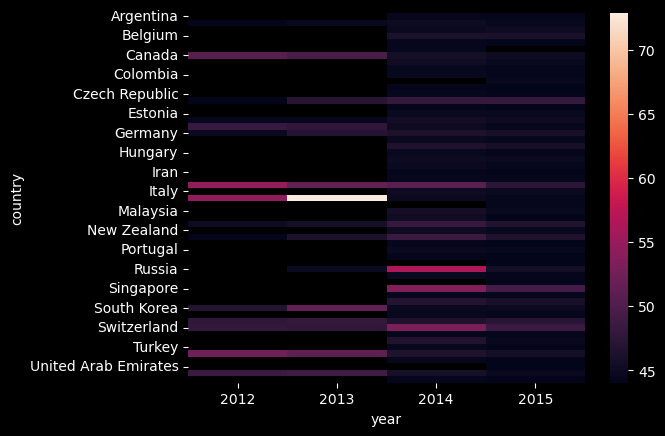

In [120]:
sns.heatmap(t)

In [130]:
model_dif_median = train.groupby(['country','quality_of_education', 'alumni_employment', 'quality_of_faculty'])['score_x_x'].agg(['count', 'median'])

In [132]:
model_dif_median

count  \
country        quality_of_education alumni_employment quality_of_faculty          
Argentina      126                  500               180                     1   
               355                  476               210                     1   
                                    478               210                     1   
               367                  513               218                     1   
                                    567               218                     1   
...                                                                         ...   
United Kingdom 367                  544               218                     1   
                                    567               159                     1   
                                                      218                     8   
Uruguay        355                  478               210                     1   
               367                  567               218                     1   

                                                                          median  
country        quality_of_education alumni_employment quality_of_faculty          
Argentina      126                  500               180                 45.370  
               355                  476               210                 44.590  
                                    478               210                 44.390  
               367                  513               218                 44.310  
                                    567               218                 44.100  
...                                                                          ...  
United Kingdom 367                  544               218                 44.540  
                                    567               159                 46.590  
                                                      218                 44.485  
Uruguay        355                  478               210                 44.350  
               367                  567               218                 44.160  

[1159 rows x 2 columns]

In [134]:
model_dif_median = model_dif_median.rename({'score_x_x':'score_x_x_median'}, axis=1)

In [136]:
train = train.merge(model_dif_median,how='left',
            on=['country', 'quality_of_education','alumni_employment','quality_of_faculty'])

In [140]:
train

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,...,year,score_mean,err,err_abs,err_abs_pct,score_median,score_y,score_x_y,count,median
0,92,University of Queensland,Australia,1,101,101,101,67,90,89,...,2012,47.662327,3.482327,3.482327,0.078821,45.04,45.972250,44.685,3,44.180
1,236,Brandeis University,USA,97,49,311,79,527,169,493,...,2014,47.662327,0.352327,0.352327,0.007447,45.04,51.603894,46.915,1,47.310
2,420,King Saud University,Saudi Arabia,1,355,133,210,611,537,800,...,2014,47.662327,2.212327,2.212327,0.048676,45.04,44.511250,44.440,1,45.450
3,251,University of Düsseldorf,Germany,21,185,567,218,297,209,182,...,2015,47.662327,1.122327,1.122327,0.024115,45.04,46.393636,45.920,1,46.540
4,66,Boston University,USA,41,303,54,83,60,45,37,...,2015,47.662327,-5.767673,5.767673,0.107948,45.04,51.603894,46.915,1,53.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,761,Peking Union Medical College,China,41,355,478,210,281,308,800,...,2014,47.662327,3.092327,3.092327,0.069381,45.04,45.045071,44.475,39,44.380
1646,706,Kaiserslautern University of Technology,Germany,46,355,478,210,652,483,800,...,2014,47.662327,3.032327,3.032327,0.067944,45.04,46.393636,45.920,16,44.975
1647,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,...,2014,47.662327,3.272327,3.272327,0.073718,45.04,44.552000,44.390,1,44.390
1648,36,École Polytechnique,France,2,150,6,208,323,282,250,...,2014,47.662327,-11.877673,11.877673,0.199491,45.04,46.196667,44.760,1,59.540


In [142]:
error(train['score_x_x'], train['median'])

0.1339636363636363
0.002903691944122101
